In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading and reading the dataset
df = pd.read_csv("/content/Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#Data Preprocessing

In [3]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


The date isn't in the date-time format

In [4]:
#Changing the date type of column "Date" into date-time
df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


<ipython-input-4-59abe4b71a3c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"]=pd.to_datetime(df["Date"])


In [5]:
#Checking for null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


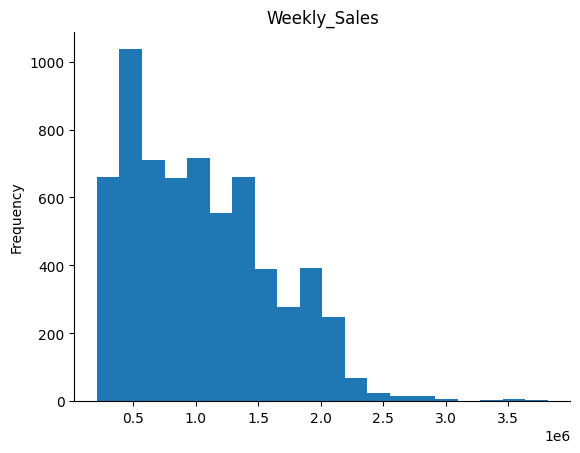

In [8]:
from matplotlib import pyplot as plt
df['Weekly_Sales'].plot(kind='hist', bins=20, title='Weekly_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

#EDA

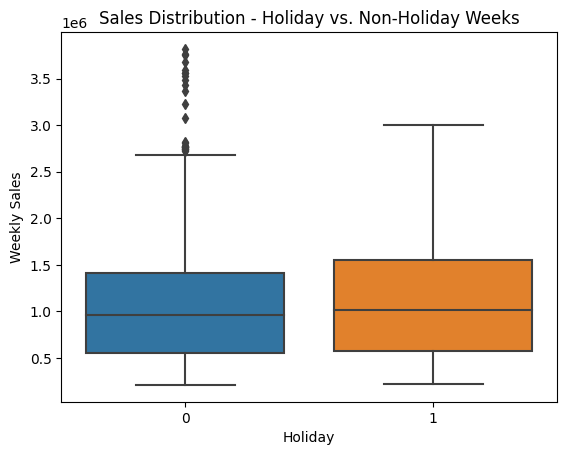

In [9]:
# Box plot to visualize sales distribution during holiday vs. non-holiday weeksplt.figure(figsize=(10, 8))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Sales Distribution - Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales')
plt.show()

Higher average sales were observed during holiday weeks.

Stores might consider adjusting inventory levels or offering specific promotions during holiday periods to capitalize on increased sales

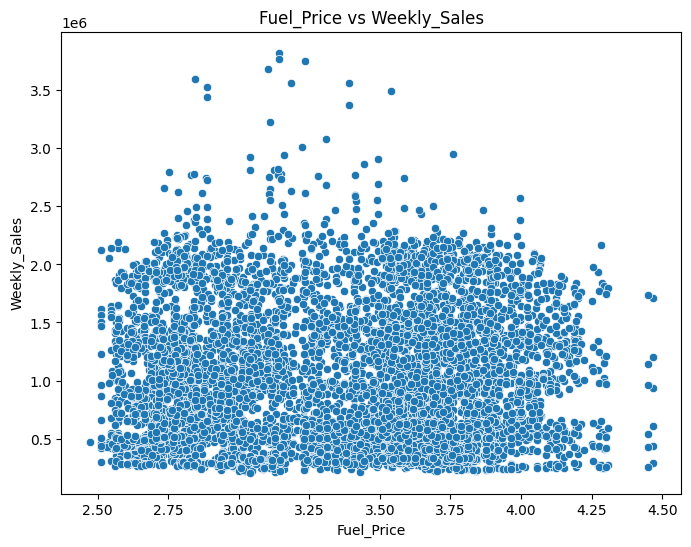

In [10]:
#Fuel_Price vs Weekly_Sales (using a scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Fuel_Price vs Weekly_Sales')
plt.show()

No clear correlation between fuel prices and weekly sales.

Stores might not significantly alter sales strategies based on fuel price fluctuations alone

<ipython-input-11-4a07426481c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


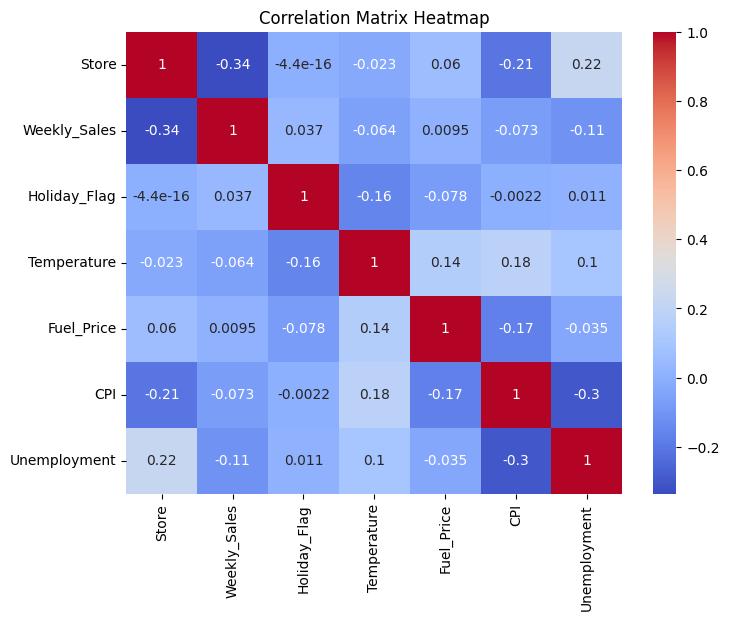

In [11]:
# Correlation matrix heatmap to visualize feature correlations
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
#Correlation Analysis
correlation_with_sales = corr_matrix['Weekly_Sales'].sort_values(ascending=False)
print("Correlation with Weekly_Sales:\n", correlation_with_sales)

Correlation with Weekly_Sales:
 Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64


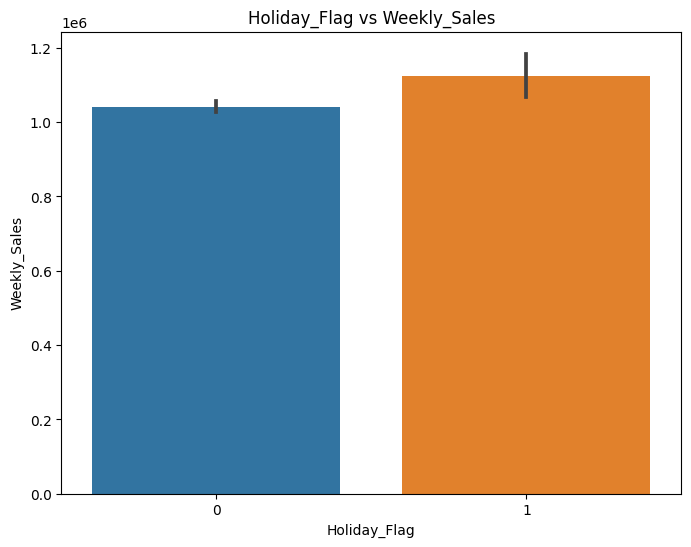

In [13]:
#Holiday_Flag vs Weekly_Sales (using a bar plot)
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.title('Holiday_Flag vs Weekly_Sales')
plt.show()

Consider enhancing holiday-specific marketing strategies, offering exclusive holiday-themed products, or introducing limited-time promotions to leverage increased sales during holiday weeks

Maintain a higher stock inventory, especially of items that are likely to get stock out during holidays

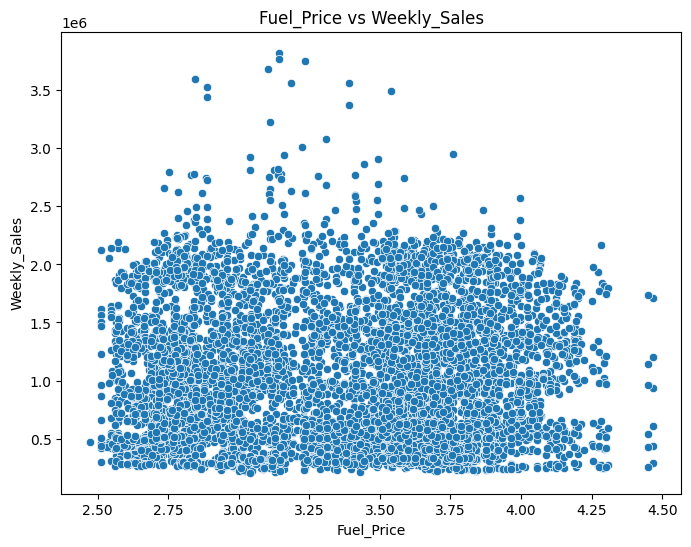

In [14]:
# Fuel_Price vs Weekly_Sales (using a scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Fuel_Price vs Weekly_Sales')
plt.show()

Implement dynamic pricing strategies or promotional offers on high-margin items irrespective of fuel price fluctuations to attract more customers and boost sales

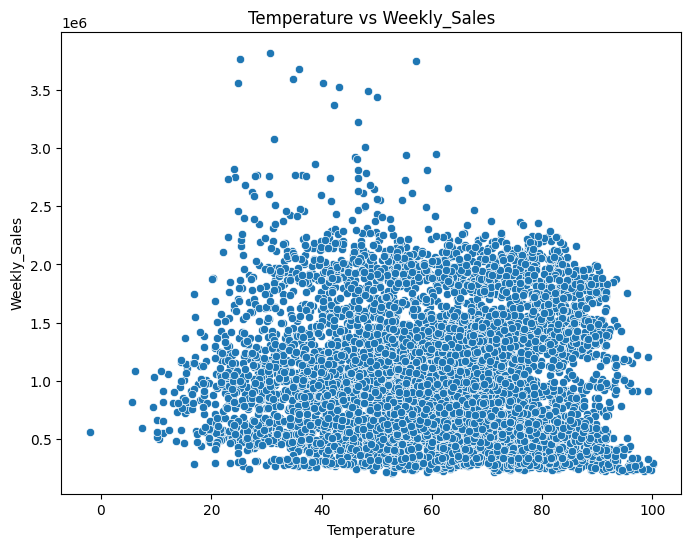

In [15]:
# Temperature vs Weekly_Sales (using a line plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Temperature vs Weekly_Sales')
plt.show()


Stocking up inventory before a drastic fall in temperatures is advisable as people might be deterred from going to stores due to the extreme cold. This preemptive action helps ensure that customers have access to essential goods, considering the potential difficulty or unwillingness to venture out in low temperatures

In [16]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


#Analysis for Store 1

In [17]:
#Storing the store 1 data seperately
Store1 = df[df["Store"]==1]

In [18]:
Store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [19]:
Store1['Date'] = pd.to_datetime(Store1['Date'])  # Convert 'Date' column to datetime if not already
Store1.set_index('Date', inplace=True)  # Set 'Date' column as the index

<ipython-input-19-6bc86fb9038b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store1['Date'] = pd.to_datetime(Store1['Date'])  # Convert 'Date' column to datetime if not already


Decomposing the data

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

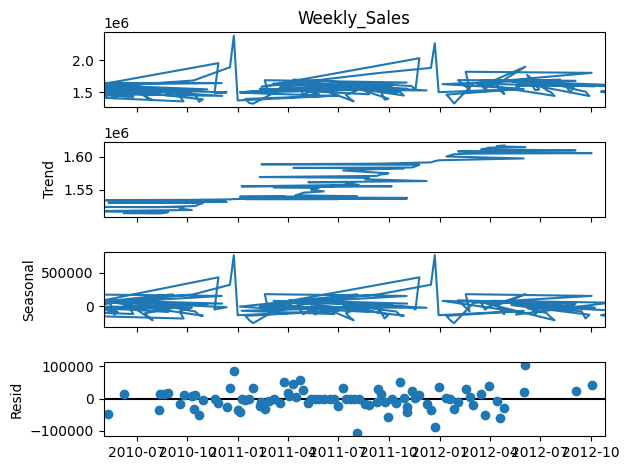

In [21]:
# Perform seasonal decomposition with a specified period (e.g., 52 for yearly seasonality)
dec = seasonal_decompose(Store1['Weekly_Sales'], model='additive', period=52)

# Plot the decomposition
dec.plot()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
AD = adfuller(Store1['Weekly_Sales'])
AD

(-5.102186145192288,
 1.3877788330759434e-05,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3412.7325502876756)

Null hypothesis is always that the data is not stationary

p-value is very small hence we reject the null hypothesis

Conclusion: the data is  stationary and time series can be performed

#Time Series Forecasting for store 1

In [23]:
#First we divide the dataset into train and test
train1 = Store1['Weekly_Sales'].iloc[:131]
test1 = Store1['Weekly_Sales'].iloc[131:]
train1, test1

(Date
 2010-05-02    1643690.90
 2010-12-02    1641957.44
 2010-02-19    1611968.17
 2010-02-26    1409727.59
 2010-05-03    1554806.68
                  ...    
 2012-06-07    1769854.16
 2012-07-13    1527014.04
 2012-07-20    1497954.76
 2012-07-27    1439123.71
 2012-03-08    1631135.79
 Name: Weekly_Sales, Length: 131, dtype: float64,
 Date
 2012-10-08    1592409.97
 2012-08-17    1597868.05
 2012-08-24    1494122.38
 2012-08-31    1582083.40
 2012-07-09    1661767.33
 2012-09-14    1517428.87
 2012-09-21    1506126.06
 2012-09-28    1437059.26
 2012-05-10    1670785.97
 2012-12-10    1573072.81
 2012-10-19    1508068.77
 2012-10-26    1493659.74
 Name: Weekly_Sales, dtype: float64)

In [24]:
#Using ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [25]:
#To know the best order for ARIMA importing itertools
import itertools
p = range(8)
d = 0 #We are taking d as 0 becasue we performed no transformations
q = range(8)
y = list(itertools.product(p,[d],q))
y

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3),
 (5, 0, 4),
 (5, 0, 5),
 (5, 0, 6),
 (5, 0, 7),
 (6, 0, 0),
 (6, 0, 1),
 (6, 0, 2),
 (6, 0, 3),
 (6, 0, 4),
 (6, 0, 5),
 (6, 0, 6),
 (6, 0, 7),
 (7, 0, 0),
 (7, 0, 1),
 (7, 0, 2),
 (7, 0, 3),
 (7, 0, 4),
 (7, 0, 5),
 (7, 0, 6),
 (7, 0, 7)]

In [26]:
#We have gotten all possible pn values for PDQ now we have to find the ones that have the lowest rmse values

from sklearn.metrics import mean_squared_error

In [27]:
rmse = []
order = []

for i in y:
  model = ARIMA(train1, order=i)
  model_fit = model.fit()
  pred = model_fit.forecast(steps=len(test1))
  err = np.sqrt(mean_squared_error(test1,pred))
  order.append(i)
  rmse.append(err)

result = pd.DataFrame(index = order, data = rmse, columns = ['RMSE'])
result.sort_values(by='RMSE', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [28]:
result

,RMSE
"(4, 0, 0)",65213.336794
"(0, 0, 3)",66250.841752
"(0, 0, 2)",67331.259577
"(1, 0, 0)",67692.264303
"(2, 0, 0)",67803.533569
...,...
"(5, 0, 1)",79752.074191
"(6, 0, 0)",79869.184838
"(5, 0, 7)",79975.186628
"(7, 0, 1)",80886.681500


p,d,q,s fro SARIMA model

In [29]:
#To know the best order for SARIMA importing itertools
import itertools
p = range(2)
d = 0 #We are taking d as 0 becasue we performed no transformations
q = range(2)
s = range(2)
x = list(itertools.product(p,[d],q,s))

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Sarima_rmse = []
Sarima_order = []

for i in y:
    for j in x:
        try:
            SA_model = SARIMAX(train1, order=i, seasonal_order=j)
            SA_model_fit = SA_model.fit()
            SA_pred = SA_model_fit.forecast(steps=len(test1))
            SA_err = np.sqrt(mean_squared_error(test1, SA_pred))
            Sarima_order.append((i, j))
            Sarima_rmse.append(SA_err)
        except:
            continue
Sarima_result = pd.DataFrame(index = Sarima_order, data = Sarima_rmse, columns = ['RMSE'])
Sarima_result.sort_values(by='RMSE', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [31]:
Sarima_result

,RMSE
"((4, 0, 0), (0, 0, 0, 0))",6.608884e+04
"((2, 0, 0), (0, 0, 0, 0))",6.668363e+04
"((1, 0, 0), (0, 0, 0, 0))",6.873215e+04
"((3, 0, 0), (0, 0, 0, 0))",7.022536e+04
"((4, 0, 1), (0, 0, 0, 0))",7.596904e+04
...,...
"((0, 0, 4), (0, 0, 0, 0))",1.366565e+06
"((0, 0, 3), (0, 0, 0, 0))",1.420276e+06
"((0, 0, 2), (0, 0, 0, 0))",1.457246e+06
"((0, 0, 1), (0, 0, 0, 0))",1.497329e+06


#Forecast

In [32]:
Sales1 = Store1["Weekly_Sales"]

In [33]:
Sales1 = pd.DataFrame(Sales1)

In [34]:
Sales1

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,1437059.26
2012-05-10,1670785.97
2012-12-10,1573072.81


In [35]:
#The lowest RMSE value identified is that of the ARIMA model and hence we will continue our forecasting using ARIMA Model
model_for_store1 = ARIMA(Sales1, order = (4,0,0))
model_for_store1_fit = model_for_store1.fit()
pred_store1 = model_for_store1_fit.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [36]:
pred_store1

143    1.561848e+06
144    1.562072e+06
145    1.549946e+06
146    1.539546e+06
147    1.551788e+06
148    1.555690e+06
149    1.554927e+06
150    1.551786e+06
151    1.553452e+06
152    1.554771e+06
153    1.555186e+06
154    1.554534e+06
Name: predicted_mean, dtype: float64

In [37]:
# Get the last date from Sales 1
last_date = Sales1.index.max()

# Create a date range for the next 12 weeks
date_range = pd.date_range(start=last_date + pd.DateOffset(weeks=1), periods=12, freq='W')

# Create a DataFrame for the forecasted data with the corresponding date range
forecasted_data = pd.DataFrame({'Date': date_range, 'Weekly_Sales': pred_store1.values})

# Set the 'Date' column as the index for the forecasted data
forecasted_data.set_index('Date', inplace=True)

# Append the forecasted data to Sales 1 DataFrame
combined_data = pd.concat([Sales1, forecasted_data])

print(combined_data)

            Weekly_Sales
Date                    
2010-05-02  1.643691e+06
2010-12-02  1.641957e+06
2010-02-19  1.611968e+06
2010-02-26  1.409728e+06
2010-05-03  1.554807e+06
...                  ...
2013-02-10  1.551786e+06
2013-02-17  1.553452e+06
2013-02-24  1.554771e+06
2013-03-03  1.555186e+06
2013-03-10  1.554534e+06

[155 rows x 1 columns]


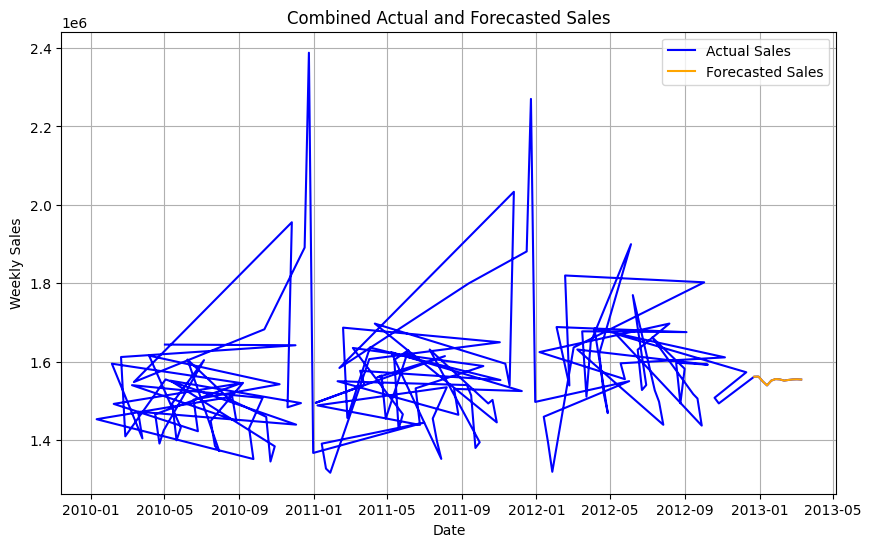

In [38]:
# Plotting the combined data with different colors for the forecasted part
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(combined_data.index[len(Sales1):], combined_data['Weekly_Sales'][len(Sales1):], label='Forecasted Sales', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Combined Actual and Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2010-05-02 to 2013-03-10
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  155 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


<ipython-input-40-96555f8f1772>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_data['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')


<Axes: xlabel='Date'>

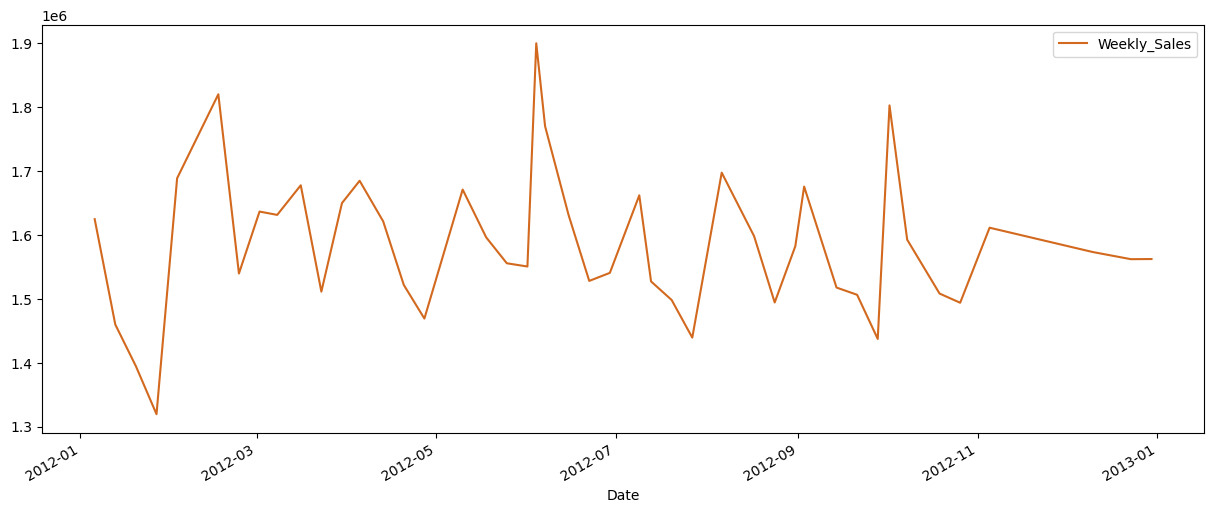

In [40]:
combined_data['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')

<ipython-input-41-1885aab83a07>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_data['2013'].plot(figsize=(15, 6),legend=True, color = 'chocolate')


<Axes: xlabel='Date'>

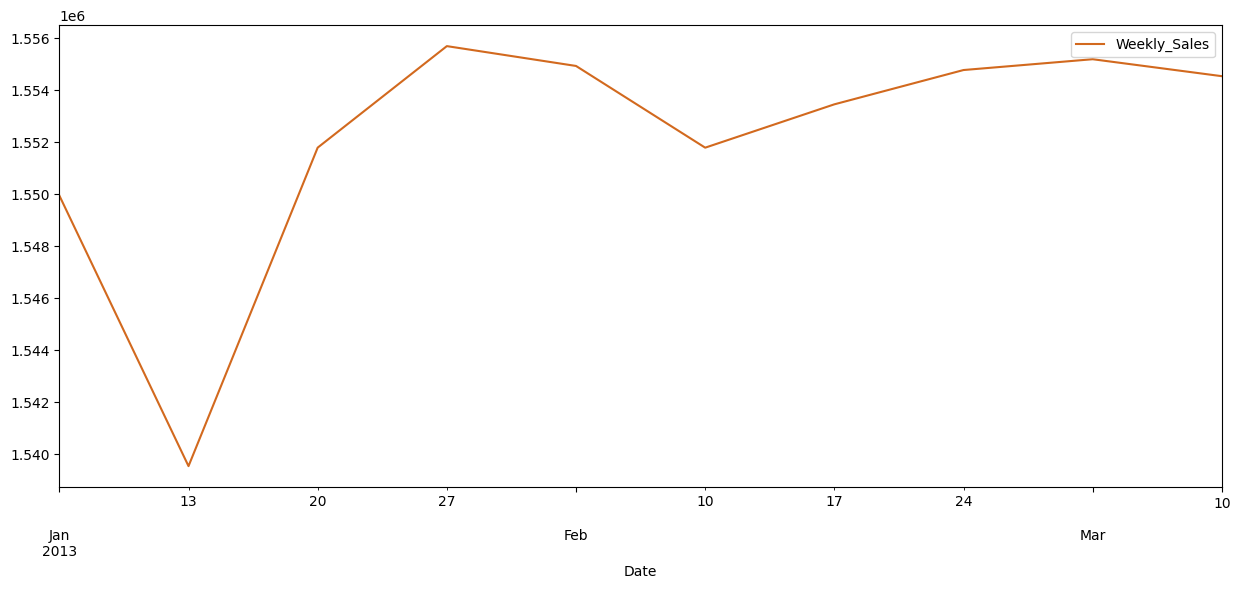

In [41]:
combined_data['2013'].plot(figsize=(15, 6),legend=True, color = 'chocolate')

#Analysis for store 2

In [42]:
# Analyzing Store 2
Store2 = df[df["Store"] == 2]

In [43]:
# Data preprocessing
Store2['Date'] = pd.to_datetime(Store2['Date'])
Store2.set_index('Date', inplace=True)

<ipython-input-43-fdb2d8018a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store2['Date'] = pd.to_datetime(Store2['Date'])


In [44]:
Store2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,2,2136989.46,0,40.19,2.572,210.752605,8.324
2010-12-02,2,2137809.50,1,38.49,2.548,210.897994,8.324
2010-02-19,2,2124451.54,0,39.69,2.514,210.945160,8.324
2010-02-26,2,1865097.27,0,46.10,2.561,210.975957,8.324
2010-05-03,2,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...
2012-09-28,2,1746470.56,0,79.45,3.666,222.616433,6.565
2012-05-10,2,1998321.04,0,70.27,3.617,222.815930,6.170
2012-12-10,2,1900745.13,0,60.97,3.601,223.015426,6.170


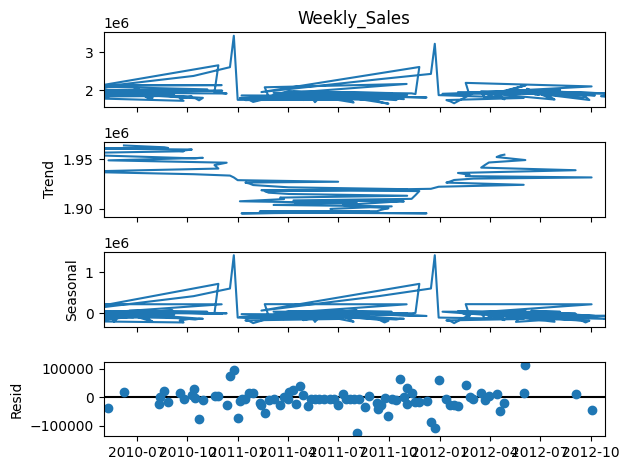

In [45]:
# Decomposing the data
dec2 = seasonal_decompose(Store2['Weekly_Sales'], model='additive', period=52)
dec2.plot()
plt.show()

In [47]:
# Stationarity check
AD2 = adfuller(Store2['Weekly_Sales'])
# Checking the p-value
AD2

(-3.7088625726189153,
 0.003990207089066268,
 6,
 136,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623},
 3512.243755386891)

The p-value obtained (0.003990207089066268) is less than the common significance levels of 1%, 5%, and 10%. This low p-value would lead to rejecting the null hypothesis of non-stationarity in favour of the alternative hypothesis, suggesting that the data is stationary.

In [48]:
# Splitting into train and test sets
train2 = Store2['Weekly_Sales'].iloc[:131]
test2 = Store2['Weekly_Sales'].iloc[131:]

In [49]:
# ARIMA model for Store 2
# Determine best order for ARIMA
p = range(8)
d = 0  # Assuming d=0 (no transformation)
q = range(8)
y = list(itertools.product(p, [d], q))

In [50]:
rmse = []
order = []

for i in y:
    model = ARIMA(train2, order=i)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=len(test2))
    err = np.sqrt(mean_squared_error(test2, pred))
    order.append(i)
    rmse.append(err)

result = pd.DataFrame(index=order, data=rmse, columns=['RMSE'])
result.sort_values(by='RMSE', inplace=True)
best_order = result.index[0]  # Select the best order with lowest RMSE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [51]:
result

,RMSE
"(4, 0, 3)",81662.953739
"(4, 0, 0)",81702.683012
"(0, 0, 4)",81853.200173
"(2, 0, 5)",81899.835114
"(2, 0, 4)",81965.477711
...,...
"(7, 0, 5)",114409.905046
"(4, 0, 7)",114442.764812
"(3, 0, 7)",114778.581141
"(7, 0, 7)",116108.644444


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

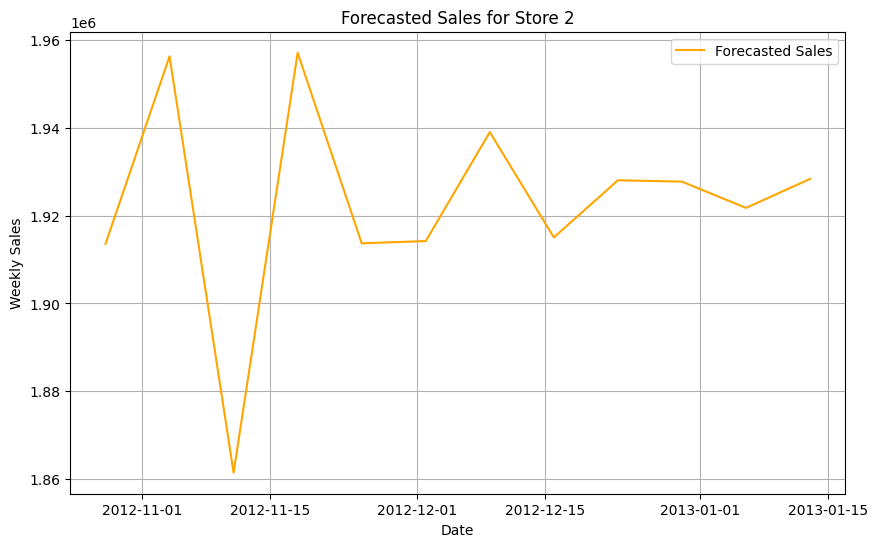

            Weekly_Sales
Date                    
2010-05-02    2136989.46
2010-12-02    2137809.50
2010-02-19    2124451.54
2010-02-26    1865097.27
2010-05-03    1991013.13
2010-12-03    1990483.78
2010-03-19    1946070.88
2010-03-26    1750197.81
2010-02-04    2066187.72
2010-09-04    1954689.21
2010-04-16    1874957.94
2010-04-23    1821990.93


In [56]:
# Forecast using ARIMA for Store 2
best_model_store2 = ARIMA(Store2['Weekly_Sales'], order=(4, 0, 3))
best_model_fit_store2 = best_model_store2.fit()
forecast_store2 = best_model_fit_store2.forecast(steps=12)


# Plot only forecasted sales for Store 2
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=Store2.index[-1], periods=12, freq='W'), forecast_store2, label='Forecasted Sales', color='orange')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Forecasted Sales for Store 2')
plt.legend()
plt.grid(True)
plt.show()


# Combine actual and forecasted data for Store 2
last_date_store2 = Store2.index.max()
date_range_store2 = pd.date_range(start=last_date_store2 + pd.DateOffset(weeks=1), periods=12, freq='W')
forecasted_data_store2 = pd.DataFrame({'Date': date_range_store2, 'Weekly_Sales': forecast_store2})
forecasted_data_store2.set_index('Date', inplace=True)
combined_data_store2 = pd.concat([Store2[['Weekly_Sales']], forecasted_data_store2])
print(combined_data_store2[:12])


#Store 3

<ipython-input-57-b009028d5135>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store3['Date'] = pd.to_datetime(Store3['Date'])


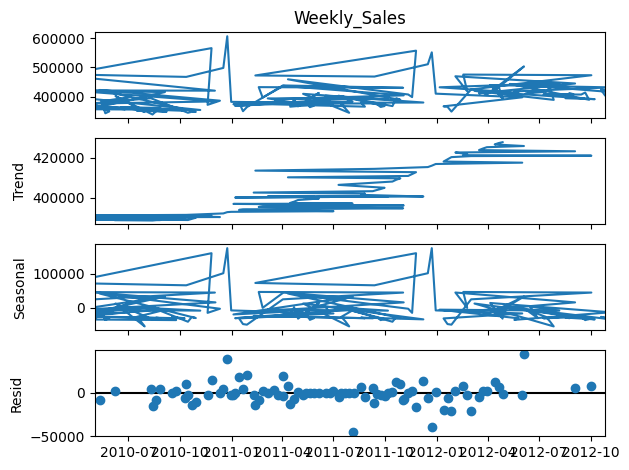

In [57]:
# Storing the store 3 data separately
Store3 = df[df["Store"] == 3]

# Convert 'Date' column to datetime if not already and set it as the index
Store3['Date'] = pd.to_datetime(Store3['Date'])
Store3.set_index('Date', inplace=True)

# Decomposing the data for Store 3
from statsmodels.tsa.seasonal import seasonal_decompose
dec_store3 = seasonal_decompose(Store3['Weekly_Sales'], model='additive', period=52)
dec_store3.plot()
plt.show()

In [58]:
# Check stationarity
from statsmodels.tsa.stattools import adfuller
AD_store3 = adfuller(Store3['Weekly_Sales'])
print(AD_store3)

(-2.963867745511323, 0.03840926179831256, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3064.8688740270823)


P-value less than 5 hence data is stationary

In [59]:
# Splitting the dataset into train and test
train3 = Store3['Weekly_Sales'].iloc[:131]
test3 = Store3['Weekly_Sales'].iloc[131:]

In [60]:
# ARIMA model for Store 3
# Determine best order for ARIMA
p = range(8)
d = 0  #d=0 (no transformation)
q = range(8)
y3 = list(itertools.product(p, [d], q))

In [63]:
rmse3 = []
order3 = []

for i in y3:
    model = ARIMA(train3, order=i)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=len(test3))
    err = np.sqrt(mean_squared_error(test3, pred))
    order3.append(i)
    rmse3.append(err)

result = pd.DataFrame(index=order3, data=rmse3, columns=['RMSE'])
result.sort_values(by='RMSE', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [64]:
result

,RMSE
"(0, 0, 0)",15781.384107
"(1, 0, 1)",15875.773028
"(2, 0, 1)",15884.137615
"(1, 0, 2)",15899.820252
"(2, 0, 2)",15925.113645
...,...
"(5, 0, 4)",18188.827785
"(0, 0, 6)",18250.550335
"(3, 0, 4)",18267.089037
"(4, 0, 4)",18296.537741


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

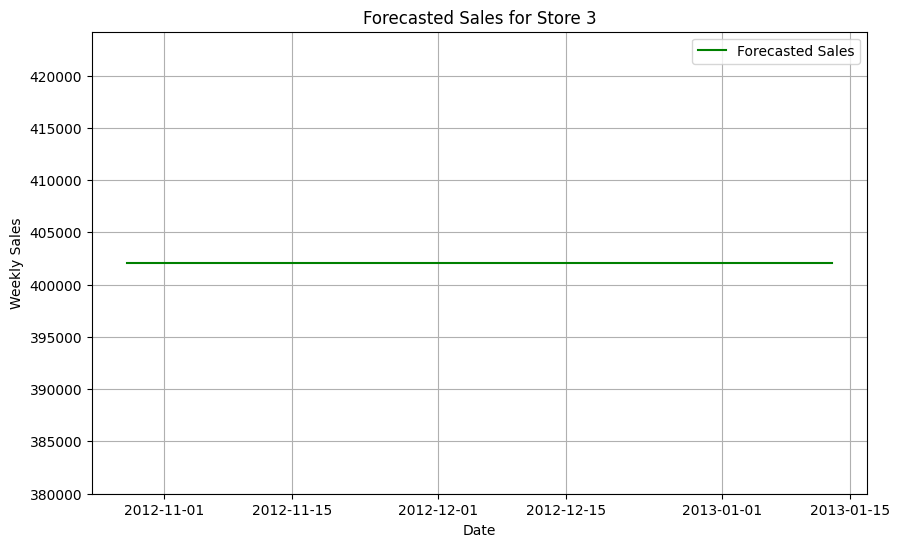

In [66]:
# ARIMA model for Store 3
best_order_store3 = (0, 0, 0)
best_model_store3 = ARIMA(train3, order=best_order_store3)
best_model_fit_store3 = best_model_store3.fit()
forecast_store3 = best_model_fit_store3.forecast(steps=12)

# Plotting only the forecasted sales for Store 3
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=Store3.index[-1], periods=12, freq='W'), forecast_store3, label='Forecasted Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Forecasted Sales for Store 3')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
sales_2010 = Store3['Weekly_Sales']['2010']
sales_2011 = Store3['Weekly_Sales']['2011']
sales_2012 = Store3['Weekly_Sales']['2012']
sales_2013 = Store3['Weekly_Sales']['2013']

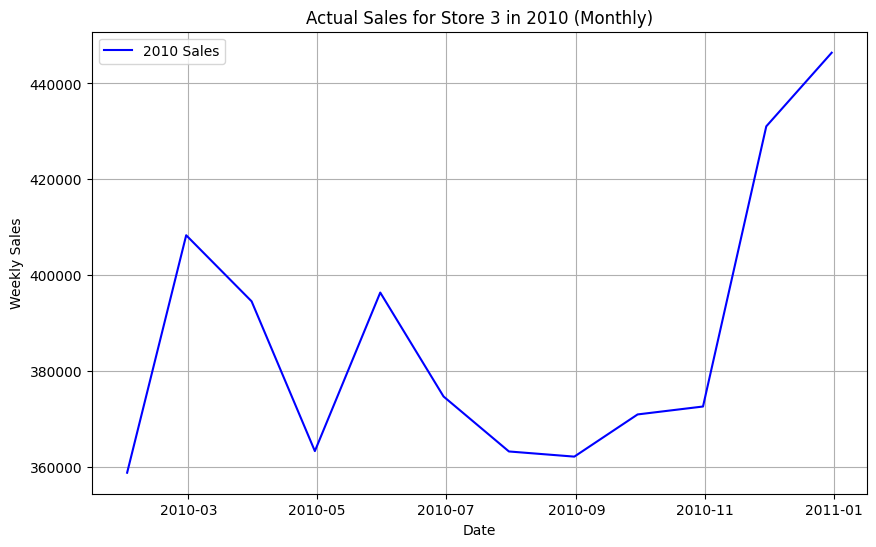

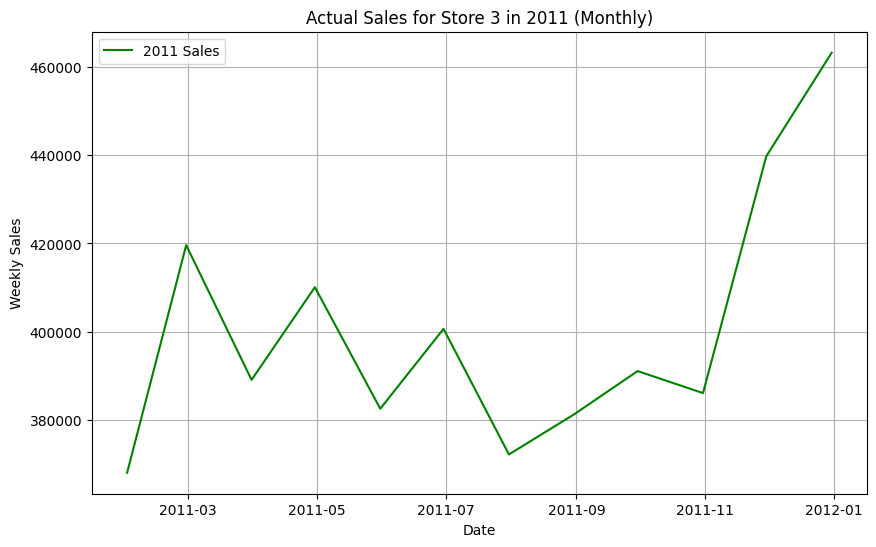

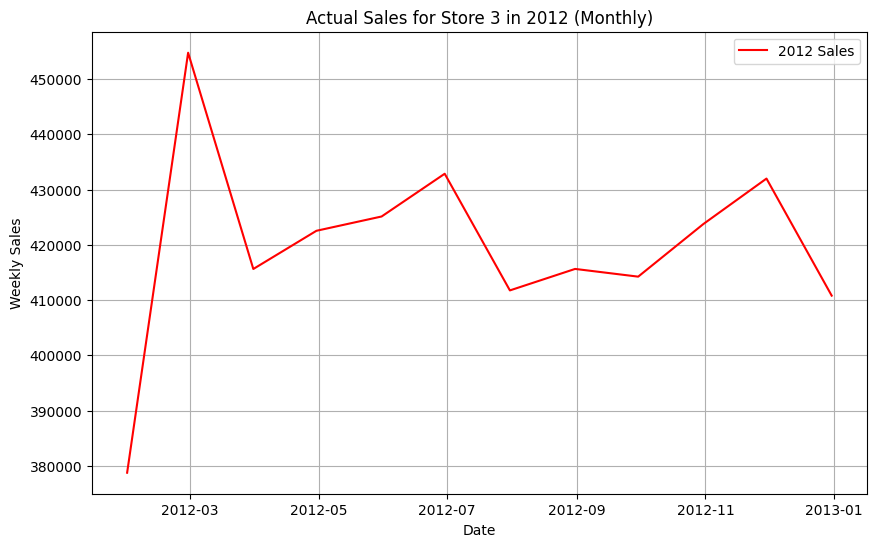

In [71]:
# Resampling sales data for each year to monthly frequency
sales_2010_monthly = sales_2010.resample('M').mean()
sales_2011_monthly = sales_2011.resample('M').mean()
sales_2012_monthly = sales_2012.resample('M').mean()
sales_2013_monthly = sales_2013.resample('M').mean()

# Plotting sales for 2010 after resampling to monthly frequency
plt.figure(figsize=(10, 6))
plt.plot(sales_2010_monthly.index, sales_2010_monthly.values, label='2010 Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual Sales for Store 3 in 2010 (Monthly)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sales for 2011 after resampling to monthly frequency
plt.figure(figsize=(10, 6))
plt.plot(sales_2011_monthly.index, sales_2011_monthly.values, label='2011 Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual Sales for Store 3 in 2011 (Monthly)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sales for 2012 after resampling to monthly frequency
plt.figure(figsize=(10, 6))
plt.plot(sales_2012_monthly.index, sales_2012_monthly.values, label='2012 Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual Sales for Store 3 in 2012 (Monthly)')
plt.legend()
plt.grid(True)
plt.show()


#Store4

In [73]:
# Filter Store 4 data
Store4 = df[df["Store"] == 4]

# Convert 'Date' column to datetime if not already
Store4['Date'] = pd.to_datetime(Store4['Date'])
Store4.set_index('Date', inplace=True)

# Resample Store 4 data to weekly frequency and interpolate missing values
Store4_weekly = Store4.resample('W').mean()
Store4_weekly.interpolate(inplace=True)

# Displaying the resampled and interpolated data
print(Store4_weekly.head())

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10    4.0  1.842821e+06           0.0     63.96000     2.61900   
2010-01-17    4.0  1.864689e+06           0.0     63.27375     2.64025   
2010-01-24    4.0  1.886557e+06           0.0     62.58750     2.66150   
2010-01-31    4.0  1.908424e+06           0.0     61.90125     2.68275   
2010-02-07    4.0  1.930292e+06           0.0     61.21500     2.70400   

                   CPI  Unemployment  
Date                                  
2010-01-10  126.234600       7.12700  
2010-01-17  126.268785       7.25375  
2010-01-24  126.302971       7.38050  
2010-01-31  126.337156       7.50725  
2010-02-07  126.371342       7.63400  


<ipython-input-73-e9a142a7c544>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store4['Date'] = pd.to_datetime(Store4['Date'])


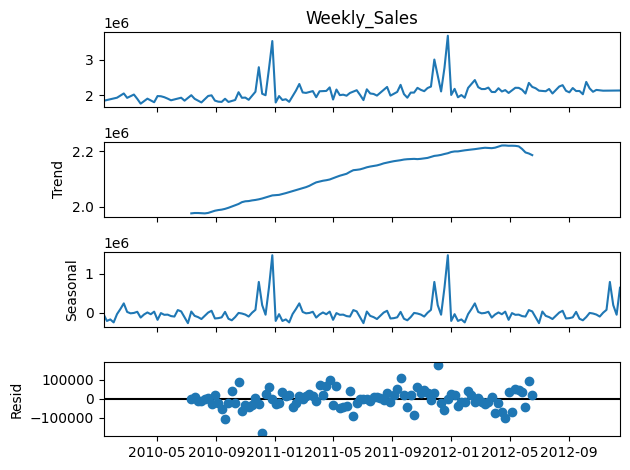

In [74]:
# Decomposing the resampled data
dec = seasonal_decompose(Store4_weekly['Weekly_Sales'], model='additive', period=52)
dec.plot()
plt.show()

In [75]:
#ADF Test
AD4 = adfuller(Store4['Weekly_Sales'])
print(AD4)

(-2.8793819840147123, 0.04779866223669836, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3534.637810757122)


The data is stationary

In [81]:
#Splitting the data
train4 = Store4_weekly['Weekly_Sales'].iloc[:100]  # Assuming 100 data points for training
test4 = Store4_weekly['Weekly_Sales'].iloc[100:]  # Remaining data for testing

#Identifying the best order
p = range(8)
d = 0  # Assuming no differencing
q = range(8)
y = list(itertools.product(p, [d], q))

In [80]:
rmse = []
order = []
for i in y:
    model = ARIMA(train4, order=i)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=len(test4))
    err = np.sqrt(mean_squared_error(test4, pred))
    order.append(i)
    rmse.append(err)

result = pd.DataFrame(index=order, data=rmse, columns=['RMSE'])
result.sort_values(by='RMSE', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

In [82]:
result

,RMSE
"(3, 0, 7)",214924.208106
"(7, 0, 7)",216483.911795
"(3, 0, 5)",217300.062300
"(4, 0, 5)",218186.857683
"(4, 0, 6)",218594.135654
...,...
"(1, 0, 1)",281660.696278
"(0, 0, 2)",284956.445064
"(0, 0, 1)",285348.085088
"(0, 0, 0)",285512.995733


In [84]:
# Using the best order for ARIMA modeling
model_for_store4 = ARIMA(Store4_weekly['Weekly_Sales'], order=(3,0,7))
model_for_store4_fit = model_for_store4.fit()
pred_store4 = model_for_store4_fit.forecast(steps=12)  # Forecasting for 12 weeks

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


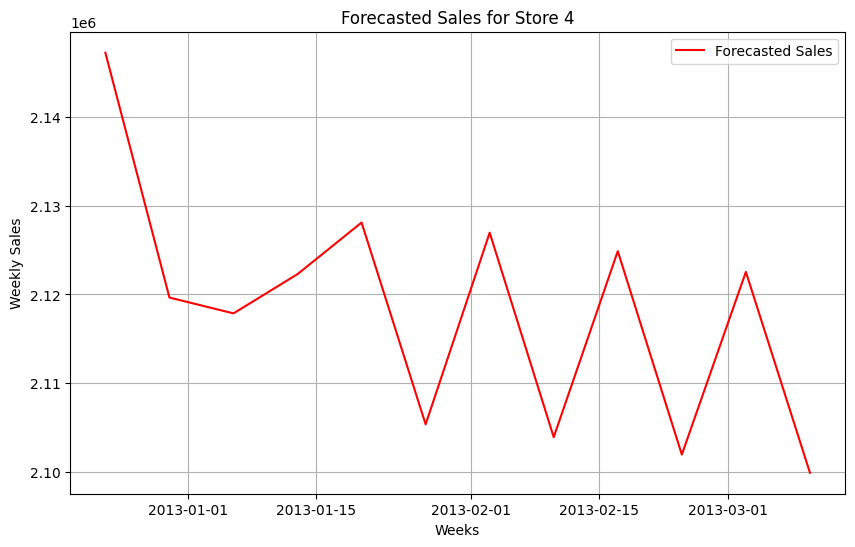

In [85]:
# Plotting the forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(pred_store4, label='Forecasted Sales', color='red')
plt.xlabel('Weeks')
plt.ylabel('Weekly Sales')
plt.title('Forecasted Sales for Store 4')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-87-b3d29656857b>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Store4_2010 = Store4_weekly['2010']
<ipython-input-87-b3d29656857b>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Store4_2011 = Store4_weekly['2011']
<ipython-input-87-b3d29656857b>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Store4_2012 = Store4_weekly['2012']


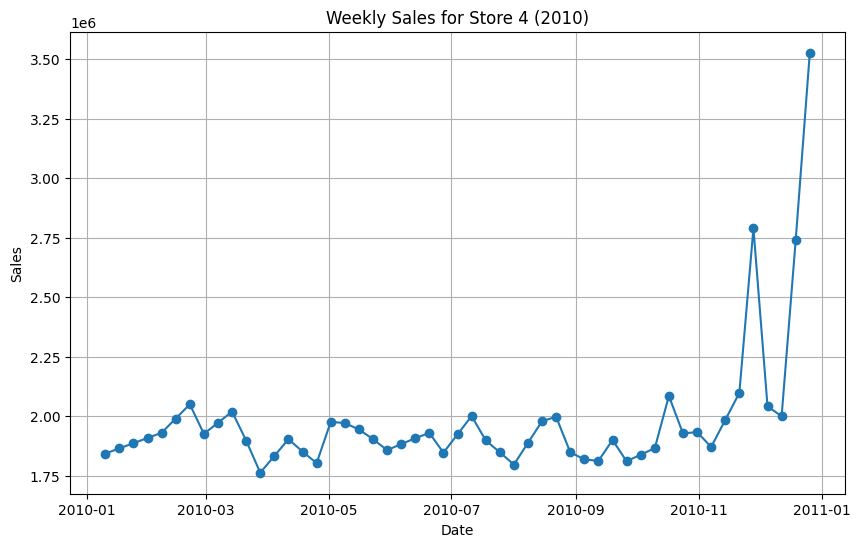

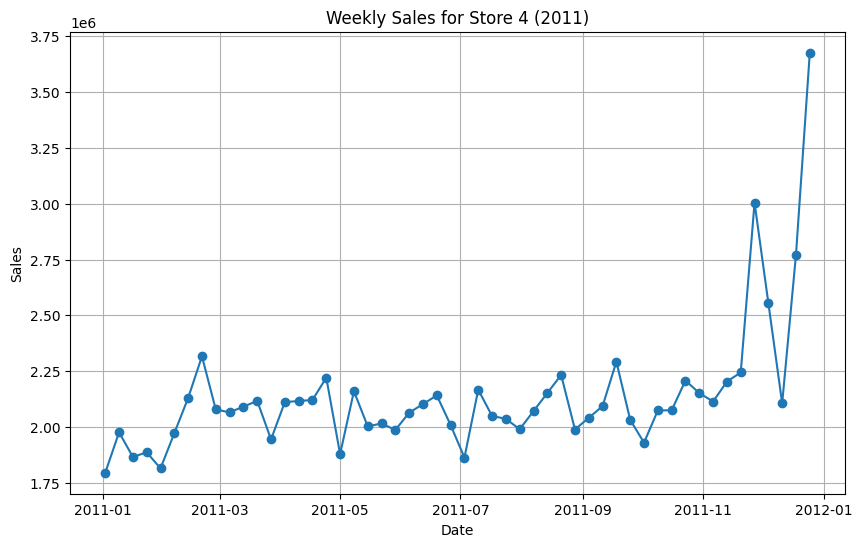

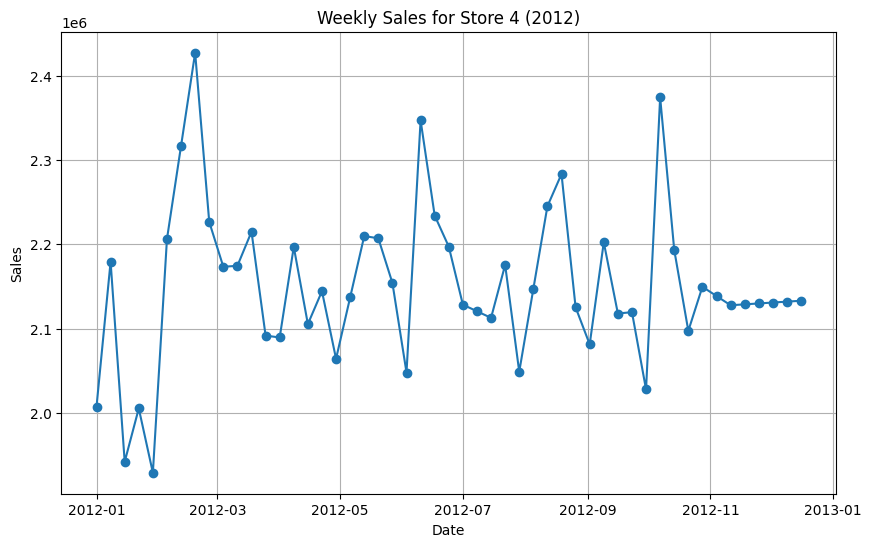

In [87]:
# Filter data for the years 2010, 2011, and 2012
Store4_2010 = Store4_weekly['2010']
Store4_2011 = Store4_weekly['2011']
Store4_2012 = Store4_weekly['2012']

# Plotting sales data for Store 4 for the year 2010
plt.figure(figsize=(10, 6))
plt.plot(Store4_2010.index, Store4_2010['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales for Store 4 (2010)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plotting sales data for Store 4 for the year 2011
plt.figure(figsize=(10, 6))
plt.plot(Store4_2011.index, Store4_2011['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales for Store 4 (2011)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plotting sales data for Store 4 for the year 2012
plt.figure(figsize=(10, 6))
plt.plot(Store4_2012.index, Store4_2012['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales for Store 4 (2012)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#Store 5

In [93]:
# Filter Store 5 data
Store5 = df[df["Store"] == 5]

# Convert 'Date' column to datetime if not already
Store5['Date'] = pd.to_datetime(Store5['Date'])
Store5.set_index('Date', inplace=True)

# Resample Store 4 data to weekly frequency and interpolate missing values
Store5_weekly = Store4.resample('W').mean()
Store5_weekly.interpolate(inplace=True)

Store5_weekly = pd.DataFrame(Store5_weekly)

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10    4.0  1.842821e+06           0.0     63.96000     2.61900   
2010-01-17    4.0  1.864689e+06           0.0     63.27375     2.64025   
2010-01-24    4.0  1.886557e+06           0.0     62.58750     2.66150   
2010-01-31    4.0  1.908424e+06           0.0     61.90125     2.68275   
2010-02-07    4.0  1.930292e+06           0.0     61.21500     2.70400   

                   CPI  Unemployment  
Date                                  
2010-01-10  126.234600       7.12700  
2010-01-17  126.268785       7.25375  
2010-01-24  126.302971       7.38050  
2010-01-31  126.337156       7.50725  
2010-02-07  126.371342       7.63400  


<ipython-input-93-67e0d3f95a4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store5['Date'] = pd.to_datetime(Store5['Date'])


In [94]:
Store5_weekly

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-01-10,4.0,1.842821e+06,0.0,63.96000,2.61900,126.234600,7.12700
2010-01-17,4.0,1.864689e+06,0.0,63.27375,2.64025,126.268785,7.25375
2010-01-24,4.0,1.886557e+06,0.0,62.58750,2.66150,126.302971,7.38050
2010-01-31,4.0,1.908424e+06,0.0,61.90125,2.68275,126.337156,7.50725
2010-02-07,4.0,1.930292e+06,0.0,61.21500,2.70400,126.371342,7.63400
...,...,...,...,...,...,...,...
2012-11-18,4.0,2.128734e+06,0.0,65.53400,3.66860,131.137933,4.22220
2012-11-25,4.0,2.129807e+06,0.0,63.42800,3.65220,131.130533,4.13640
2012-12-02,4.0,2.130880e+06,0.0,61.32200,3.63580,131.123133,4.05060


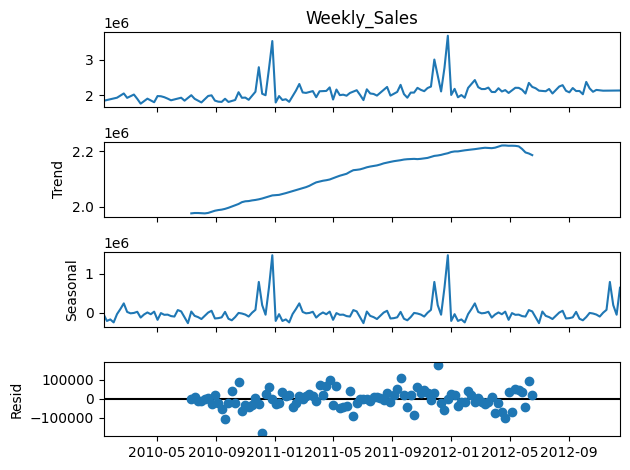

In [90]:
# Decomposing the resampled data
dec5 = seasonal_decompose(Store5_weekly['Weekly_Sales'], model='additive', period=52)
dec5.plot()
plt.show()

In [91]:
#ADF Test
AD5 = adfuller(Store5_weekly['Weekly_Sales'])
print(AD5)

(-3.971141916712558, 0.0015693919304775614, 4, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 3835.783159860547)


Data is stationary

In [96]:
#Splitting the data
train5 = Store5_weekly['Weekly_Sales'].iloc[:142]  # Assuming 100 data points for training
test5 = Store5_weekly['Weekly_Sales'].iloc[142:]  # Remaining data for testing

In [97]:
rmse5 = []
order5 = []
for i in y:
    model = ARIMA(train5, order=i)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=len(test5))
    err = np.sqrt(mean_squared_error(test5, pred))
    order5.append(i)
    rmse5.append(err)

result = pd.DataFrame(index=order5, data=rmse5, columns=['RMSE'])
result.sort_values(by='RMSE', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

In [98]:
result

,RMSE
"(6, 0, 7)",73719.062237
"(1, 0, 7)",74433.549546
"(7, 0, 7)",75245.807598
"(6, 0, 5)",75284.783443
"(4, 0, 7)",75398.429165
...,...
"(2, 0, 1)",99485.138593
"(0, 0, 3)",99904.163923
"(0, 0, 2)",100042.890212
"(0, 0, 0)",100063.791987


In [99]:
# Using the best order for ARIMA modeling
model_for_store5 = ARIMA(Store5_weekly['Weekly_Sales'], order=(6,0,7))
model_for_store5_fit = model_for_store5.fit()
pred_store5 = model_for_store5_fit.forecast(steps=12)  # Forecasting for 12 weeks

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


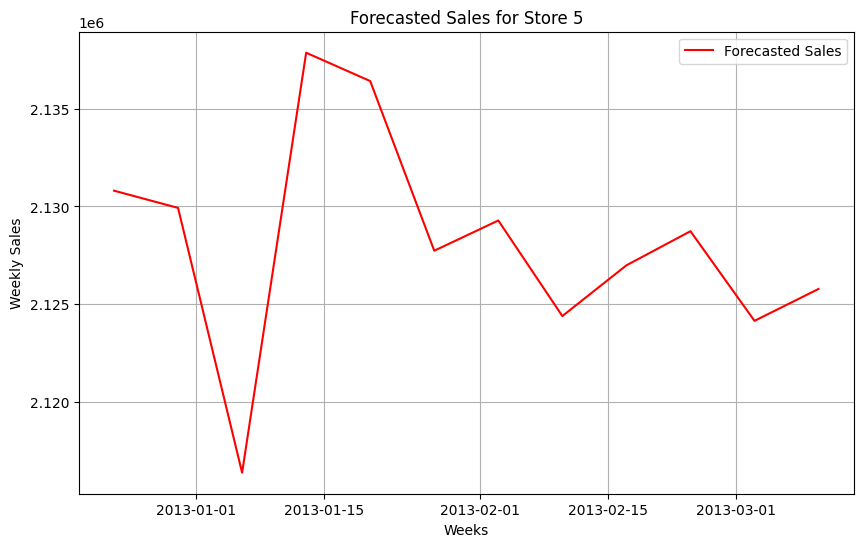

<ipython-input-100-e8e99c80e30f>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Store5_2010 = Store5_weekly['2010']
<ipython-input-100-e8e99c80e30f>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Store5_2011 = Store5_weekly['2011']
<ipython-input-100-e8e99c80e30f>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Store5_2012 = Store5_weekly['2012']


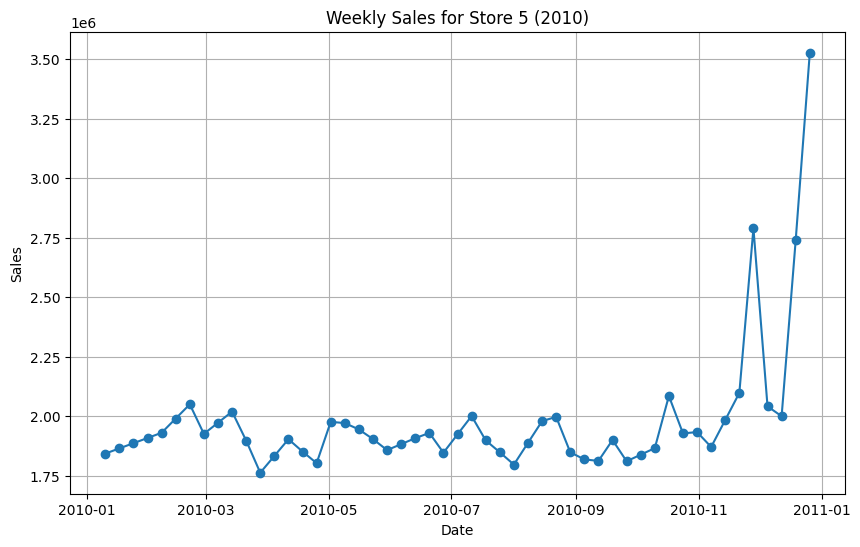

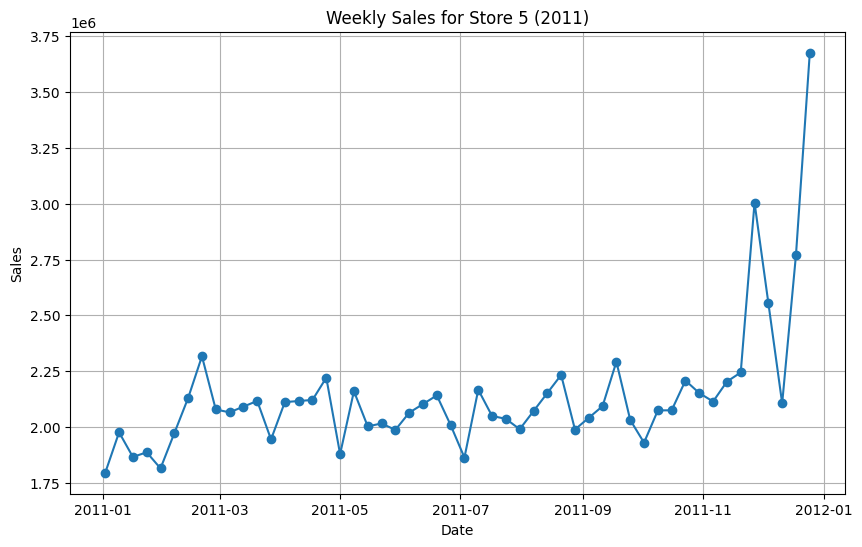

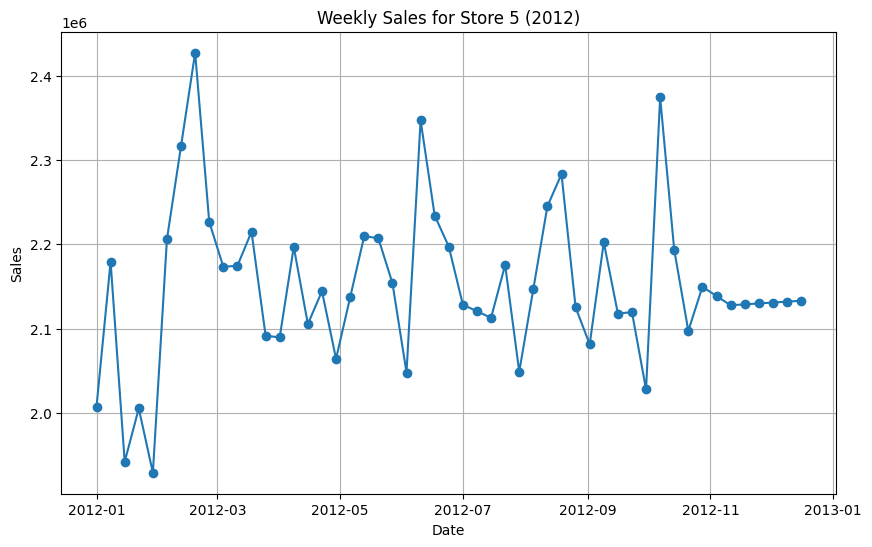

In [100]:
# Plotting the forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(pred_store5, label='Forecasted Sales', color='red')
plt.xlabel('Weeks')
plt.ylabel('Weekly Sales')
plt.title('Forecasted Sales for Store 5')
plt.legend()
plt.grid(True)
plt.show()

# Filter data for the years 2010, 2011, and 2012
Store5_2010 = Store5_weekly['2010']
Store5_2011 = Store5_weekly['2011']
Store5_2012 = Store5_weekly['2012']

# Plotting sales data for Store 5 for the year 2010
plt.figure(figsize=(10, 6))
plt.plot(Store5_2010.index, Store5_2010['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales for Store 5 (2010)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plotting sales data for Store 5 for the year 2011
plt.figure(figsize=(10, 6))
plt.plot(Store5_2011.index, Store5_2011['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales for Store 5 (2011)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plotting sales data for Store 5 for the year 2012
plt.figure(figsize=(10, 6))
plt.plot(Store5_2012.index, Store5_2012['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales for Store 5 (2012)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()